In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#reading the dataset using pandas and saving it in a dataframe
df = pd.read_csv('IOT_Assignment_2_data_regression_sensor_range.csv')

In [3]:
df.head()

,Humidity(%),Temperature(°C),WaterFlow(%)
0,25.045045,76.856857,67.432607
1,8.880881,31.771772,0.000000
2,24.956957,75.735736,66.105904
3,40.328328,88.308308,0.000000
4,38.742743,57.157157,0.000000


In [4]:
# converting the whole dataset to a  list
dataset = df.values
np.random.shuffle(dataset)

In [5]:
#taking the features in x and the target values are in y
x = np.array(dataset[:,0:2])
y = dataset[:,2]

In [6]:
#using the MinMaxscaler() scaling the data so that every data point comes in an uniform range(0,1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
#splitting features and the target values to test and train sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

In [8]:
# # this is for finding the optimal parameters
# first_neuron_number = [2,3,4,5,6,7,8,9]
# second_neuron_number = [2,3,4,5,6,7,8,9]
# iter_size = [500,1000,1500,2000,2500,3000]
# batch_size = [8,16,32,64]
# temp = []
# for i in iter_size:
#   for j in batch_size:
#     for k in first_neuron_number:
#       for l in second_neuron_number:
#         model = Sequential()
#         model.add(Dense(k, activation = 'relu'))
#         model.add(Dense(l, activation = 'relu'))
#         model.add(Dense(1))
#         model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
#         history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=i,batch_size = j,verbose=0)
#         temp.append([i,j,k,l,model.evaluate(x_test,y_test,verbose=0)[1]])

In [9]:
# temp = np.array(temp)
# temp = sorted(temp,key=lambda x: x[4])

In [10]:
# temp[0]

In [11]:
# number_of_epochs = int(temp[0][0]) #1500
# batch = int(temp[0][1]) #8
# first_neuron_number = int(temp[0][2])#6
# second_neuron_number = int(temp[0][3])#2

In [12]:
number_of_epochs = 1500
batch = 8
first_neuron_number = 6 
second_neuron_number = 2

In [13]:
# initilising the model
model = Sequential()

In [14]:
#adding layers with two perceptrons in the model
model.add(Dense(first_neuron_number, activation = 'relu'))# first hidden layer
model.add(Dense(second_neuron_number, activation = 'relu'))#second hidden layer
model.add(Dense(1))

In [15]:
#compiling the model wih adam optimizer 
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [16]:
#here we train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=number_of_epochs,batch_size = batch,verbose=0)

In [17]:
best_mae = model.evaluate(x_test, y_test,verbose=0)[1]
print('The total Mean absolute error is {}'.format(best_mae))

The total Mean absolute error is 11.783225059509277


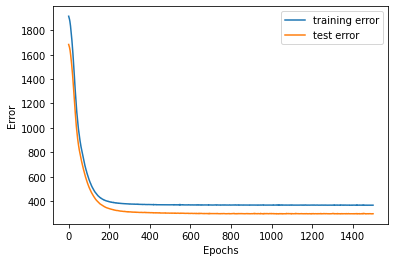

In [18]:
plt.plot(history.history['loss'], label='training error')
plt.plot(history.history['val_loss'], label='test error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

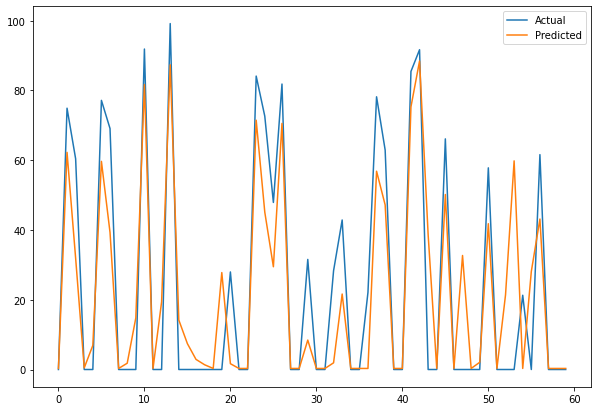

In [19]:
#this plot shows the predictions against the real values
plt.rcParams["figure.figsize"] = (10,7)
y_pred = model.predict(x_test)
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.show()

In [20]:
# #this are the parameters that we get after the training has concluded
w0 = model.layers[0].get_weights()[0]
b0 = model.layers[0].get_weights()[1]
w1 = model.layers[1].get_weights()[0]
b1 = model.layers[1].get_weights()[1]
w2 = model.layers[2].get_weights()[0]
b2 = model.layers[2].get_weights()[1]

In [35]:
print("The parameters are:")
print('Number of epochs used : {}'.format(number_of_epochs))
print('Batch size used: {}'.format(batch))
print(" ")
print("weights 0 :\n {}".format(w0))
print(" ")
print("bias 0: \n{}".format(b0))
print(" ")
print("weight 1: \n{}".format(w1))
print(" ")
print("bias 1: \n{}".format(b1))
print(" ")
print("weight 2 : \n{}".format(w2))
print(" ")
print("bias 2 : \n {}".format(b2))
print('The total Mean absolute error is {}'.format(best_mae))

The parameters are:
Number of epochs used : 1500
Batch size used: 8
 
weights 0 :
 [[-0.5468823  -0.14767098  0.52103525  2.0302563  -0.31882265 -0.29947653]
 [-0.3527497   2.6865528   1.9953825  -2.0724196   0.05666221  2.1026747 ]]
 
bias 0: 
[ 0.          0.43384153  0.5114199   1.1765654  -0.04385916 -0.44039676]
 
weight 1: 
[[ 0.41678566 -0.501751  ]
 [ 2.2760332   2.327208  ]
 [ 0.78877336  1.8958851 ]
 [-4.6289067  -4.6149497 ]
 [-0.5490287  -0.55230045]
 [ 1.4287139   1.7659128 ]]
 
bias 1: 
[0.3146908 0.3218678]
 
weight 2 : 
[[3.657283 ]
 [3.1764765]]
 
bias 2 : 
 [0.30167854]
The total Mean absolute error is 11.783225059509277
